<a href="https://colab.research.google.com/github/nuramaliasusanti/nuramaliasusanti/blob/main/Day_3_Revou_Mini_Course_Practical_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE DATA ANALYSIS WITH PYTHON**

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read and Clean Data**

**Read Data**

In [2]:
data = 'https://docs.google.com/spreadsheets/d/1mSslatBwaydYUdZYdJSHkZA-wisvV1ViXhpQkGBgH6o/edit#gid=1903509374'
data_rpl = data.replace('/edit#gid=', '/export?format=csv&gid=') #mengubah format tabel excel ke csv
new_data = pd.read_csv(data_rpl)
new_data.head() #menampilkan 5 data teratas dari tabel

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


In [3]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [5]:
new_data.columns 

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

**Clean Data**

In [8]:
new_df = new_data.copy() #membuat salinan data
new_df['Date'] = pd.to_datetime(new_df['Date']) #mengubah tipe data kolom menjadi satuan waktu
new_df['Revenue'] = new_df['Unit price'] * new_df['Quantity'] #membuat kolom baru revenue 
print(new_df.dtypes, '\n') #mengecek tipe data dari tiap kolom yang telah diubah
new_df.head()

Date             datetime64[ns]
Payment                  object
Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Revenue                 float64
dtype: object 



,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [9]:
#cek apakah ada typo dalam kolom
new_df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [11]:
#membuat looping untuk cek typo dari tiap kolom
for col_name in ['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity']:
       print(new_df[col_name].value_counts(), '\n')

2019-02-07    20
2019-02-15    19
2019-03-14    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: Date, Length: 89, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health

In [12]:
#mengoreksi typo pada kolom 'Gender'
dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'} #dictionary 

new_df_rpl = new_df.replace(dict_typo) #mengganti typo 
new_df_rpl.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [13]:
new_df_rpl['Gender'].value_counts() #mengecek apakah masih terdapat typo

Female    501
Male      499
Name: Gender, dtype: int64

In [15]:
#mengecek apakah kolom "Invoice ID" terdapat data yang duplikat
new_df_rpl['Invoice ID'].duplicated().sum()

0

In [17]:
#re-checking
for col_name in ['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity']:
       print(new_df_rpl[col_name].value_counts(), '\n')

2019-02-07    20
2019-02-15    19
2019-03-14    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: Date, Length: 89, dtype: int64 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line

# **Exploratory Data Analysis (EDA)**

In [18]:
new_df_rpl.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


## Daily Trend Overall

In [21]:
agg_daily = new_df_rpl.groupby('Date', as_index = False)['Quantity', 'Revenue'].sum()
agg_daily.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Quantity,Revenue
0,2019-01-01,81,4519.22
1,2019-01-02,48,1852.86
2,2019-01-03,37,1979.17
3,2019-01-04,32,1546.37
4,2019-01-05,55,3368.27


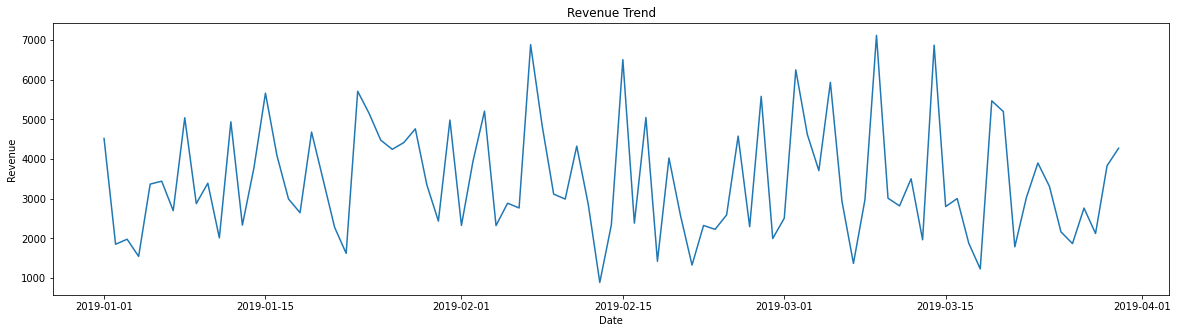

In [27]:
plt.rcParams["figure.figsize"] = (20,5) #mengatur ukuran tampilan grafik
plt.title('Revenue Trend') #menampilkan judul grafik
sns.lineplot(data = agg_daily, x='Date', y='Revenue') #membuat grafik dengan library seaborn

## Revenue by Payments

In [30]:
agg_payments = new_df_rpl.groupby('Payment', as_index = False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_payments.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


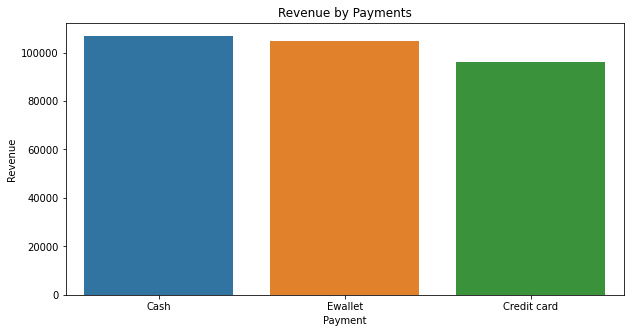

In [37]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Revenue by Payments')
sns.barplot('Payment', 'Revenue', data = agg_payments.sort_values('Revenue', ascending = False))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


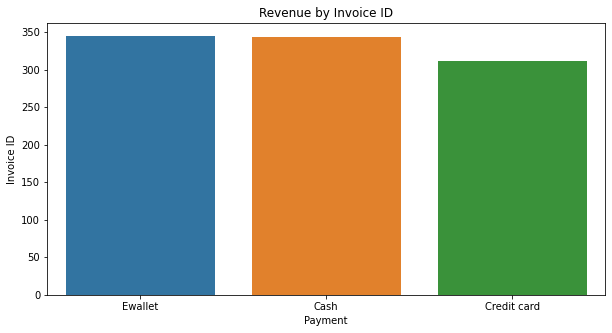

In [36]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Revenue by Invoice ID')
sns.barplot('Payment', 'Invoice ID', data = agg_payments.sort_values('Invoice ID', ascending = False))

([<matplotlib.patches.Wedge at 0x7efdcc5e3990>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

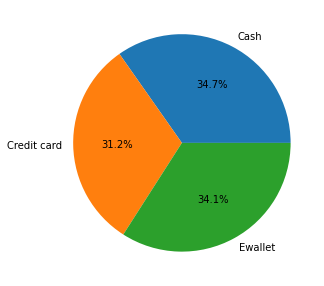

In [45]:
plt.pie(agg_payments['Revenue'], labels = agg_payments['Payment'], autopct='%.1f%%')

## By Gender and Product Type

In [39]:
agg_gnd = new_df_rpl.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gnd.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


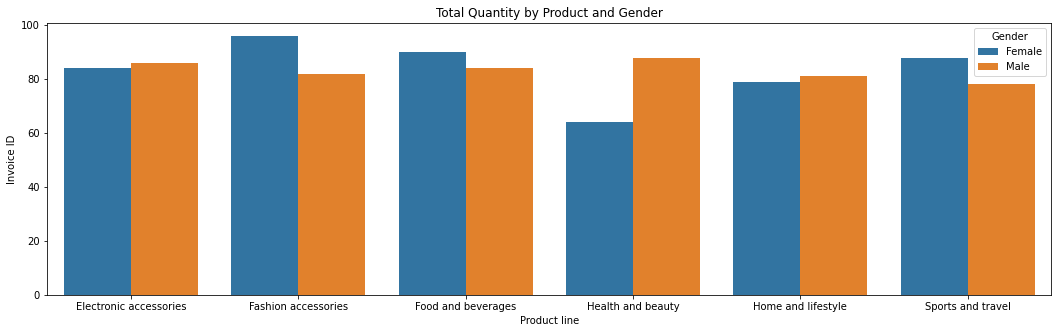

In [44]:
plt.rcParams["figure.figsize"] = (18, 5)
plt.title('Total Quantity by Product and Gender')
sns.barplot('Product line', 'Invoice ID', data = agg_gnd, hue = 'Gender')

In [47]:
agg_gender = new_df_rpl.groupby('Gender', as_index=False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Invoice ID
0,Female,501
1,Male,499


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


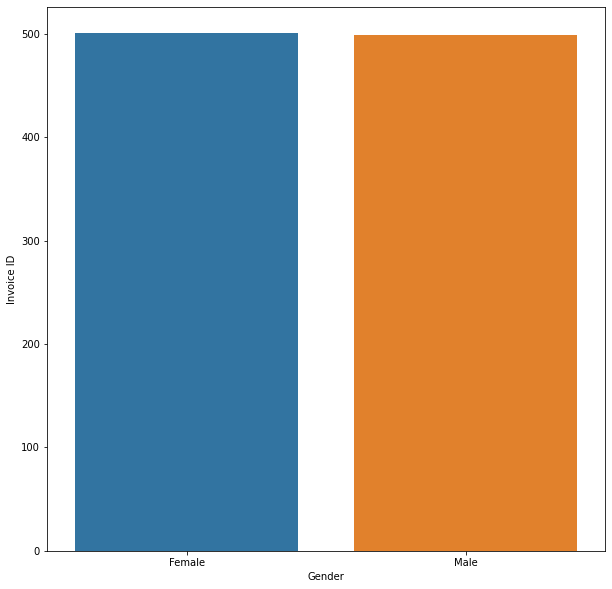

In [49]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.barplot('Gender', 'Invoice ID', data = agg_gender)

# **Summary**

Berdasarkan analisis yang telah dilakukan, didapatkan bahwa :
1. Revenue yang berhasil didapatkan paling banyak dihasilkan oleh customer dengan metode pembayaran cash dengan presentase 34,7%
2. Jika dilihat dari data, customer lebih menyukai metode pembayaran dengan e-wallet untuk melakukan transaksi dengan jumlah invoice yang dibuat 345 invoice 
3. Tercatat, customer yang paling banyak melakukan transaksi pembelian berjenis kelamin perempuan dengan jumlah 501 customer. 